In [0]:
import torchvision 


svhn_extraset = torchvision.datasets.SVHN('./SVHN', split='extra', transform=None, target_transform=None, download=False)
#svhn_testset = torchvision.datasets.SVHN('./SVHN', split='test', transform=None, target_transform=None, download=True)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D,Conv2DTranspose
from sklearn.model_selection import train_test_split
from skimage import color
from skimage import io
import cv2

Using TensorFlow backend.


In [0]:
gray_svhn_extra = []
for i in range(np.shape(svhn_extraset.data)[0]):
  temp = color.rgb2gray(svhn_extraset.data[i].T).T
  norm_image = cv2.normalize(temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  gray_svhn_extra.append(np.array(norm_image.reshape(1,32,32)))

7

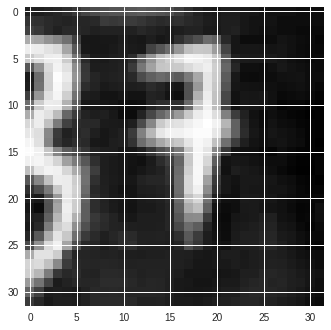

In [4]:
index =323
plt.imshow(gray_svhn_extra[index].reshape(32,32))
svhn_extraset.labels[index]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(gray_svhn_extra,svhn_extraset.labels,test_size = 0.2,random_state = 42)

In [0]:
y_train_oe = keras.utils.to_categorical(y_train,num_classes = 10)
y_test_oe = keras.utils.to_categorical(y_test,num_classes = 10)

In [7]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(1,32,32),padding="same", data_format="channels_first"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2) , data_format="channels_first"))
model.add(Conv2D(128,kernel_size=(3,3), padding="same", data_format="channels_first"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2) , data_format="channels_first"))
model.add(Conv2D(256,kernel_size=(3,3), padding="same", data_format="channels_first"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2) , data_format="channels_first"))
model.add(Conv2D(128,kernel_size=(4,4), padding="same", data_format="channels_first"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4) , data_format="channels_first"))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 32, 32)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 16, 16)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 128, 16, 16)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 8, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 8, 8)         295168    
__________

In [9]:
model.fit(np.array(x_train),y_train_oe,epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
424904/424904 [==============================] - 220s 517us/step - loss: 0.1588 - acc: 0.9524
Epoch 2/10
424904/424904 [==============================] - 218s 512us/step - loss: 0.0706 - acc: 0.9812
Epoch 3/10
424904/424904 [==============================] - 218s 513us/step - loss: 0.0556 - acc: 0.9862
Epoch 4/10
424904/424904 [==============================] - 217s 512us/step - loss: 0.0466 - acc: 0.9888
Epoch 5/10
424904/424904 [==============================] - 217s 511us/step - loss: 0.0397 - acc: 0.9908
Epoch 6/10
424904/424904 [==============================] - 217s 511us/step - loss: 0.0335 - acc: 0.9927
Epoch 7/10
424904/424904 [==============================] - 219s 516us/step - loss: 0.0289 - acc: 0.9942
Epoch 8/10
424904/424904 [==============================] - 219s 516us/step - loss: 0.0253 - acc: 0.9951
Epoch 9/10
424904/424904 [==============================] - 219s 514us/step - loss: 0.0221 - acc: 0.9960
Epoch 1

In [11]:
model.evaluate(np.array(x_test),y_test_oe)

106227/106227 [==============================] - 17s 161us/step


[0.12321339084814353, 0.9833658109520178]

In [12]:
model.metrics_names

['loss', 'acc']